<a href="https://colab.research.google.com/github/RoniAndarsyah/KlasifikasiKNearestNeighbor-KNNPython/blob/master/KNN_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('Data Intelligent Irrigation System.csv')

In [ ]:
dataset.head()

In [14]:
x = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

In [ ]:
print(y)

In [18]:
## Datatraining
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
print(x_train)

In [20]:
len(x_train)

150

In [21]:
len(x)

200

In [22]:
len(x_test)

50

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

menentukan Prediksi

In [32]:
y_pred = classifier.predict(x_test)

Evaluasi dan Validasi

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  2]
 [ 0 36]]


In [34]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.95      1.00      0.97        36

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred) 
print("Tingkat Akurasi :%d persen"%(akurasi*100))

#Visualisasi Data (Grafik)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


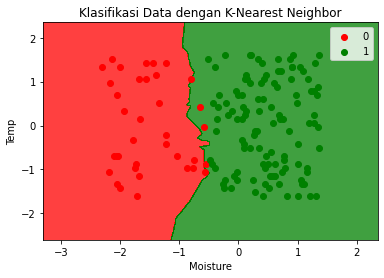

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-Nearest Neighbor')
plt.xlabel('Moisture')
plt.ylabel('Temp')
plt.legend()
plt.show()